In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import math

import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics

from scipy.special import legendre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df = pd.read_csv('all_matches_final.csv')

In [4]:
df.describe()

,draw_size,tourney_date,match_num,Player1_ht,Player1_age,best_of,minutes,Player2_id,Player2_seed,Player2_ht,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Player2_rank,Player2_rank_points,Player1_rank,Player1_rank_points,y
count,99360.000000,9.936000e+04,99360.000000,94738.000000,99247.000000,99360.000000,86872.000000,99360.000000,30545.000000,93731.000000,...,89475.000000,89475.000000,89476.000000,89475.000000,89475.000000,97685.000000,96693.000000,97675.000000,96686.000000,99360.000000
mean,53.007568,2.004922e+07,63.579006,185.447762,25.844574,3.444243,103.130019,105058.821488,7.300671,185.322219,...,31.827103,15.002626,12.188710,4.813434,8.750768,100.975800,1041.937369,99.262647,1253.805670,0.500000
std,38.242706,8.848977e+04,107.630448,7.044066,3.805208,0.831349,39.211800,11028.044887,6.260864,6.753921,...,14.449350,7.228977,4.127567,3.274505,4.130267,165.065907,1077.558313,155.127915,1734.731502,0.500003
min,2.000000,1.990123e+07,1.000000,1.700000,14.757016,3.000000,0.000000,100284.000000,1.000000,1.700000,...,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,1.997062e+07,9.000000,180.000000,23.039014,3.000000,75.000000,102087.000000,3.000000,180.000000,...,22.000000,10.000000,9.000000,2.000000,6.000000,27.000000,458.000000,26.000000,439.250000,0.000000
50%,32.000000,2.004102e+07,23.000000,185.000000,25.612594,3.000000,96.000000,103428.000000,6.000000,185.000000,...,29.000000,14.000000,11.000000,4.000000,8.000000,59.000000,745.000000,58.000000,748.000000,0.500000
75%,64.000000,2.012092e+07,53.000000,190.000000,28.410678,3.000000,125.000000,104660.000000,9.000000,190.000000,...,39.000000,19.000000,15.000000,7.000000,11.000000,103.000000,1230.000000,105.000000,1310.000000,1.000000
max,128.000000,2.021120e+07,1701.000000,211.000000,43.655031,5.000000,1146.000000,210274.000000,35.000000,211.000000,...,284.000000,101.000000,91.000000,28.000000,38.000000,2159.000000,16950.000000,2101.000000,16950.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99360 entries, 0 to 99359
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tourney_id           99360 non-null  object 
 1   tourney_name         99360 non-null  object 
 2   surface              99360 non-null  object 
 3   draw_size            99360 non-null  int64  
 4   tourney_level        99360 non-null  object 
 5   tourney_date         99360 non-null  int64  
 6   match_num            99360 non-null  int64  
 7   Player1_entry        15877 non-null  object 
 8   Player1_name         99360 non-null  object 
 9   Player1_hand         99351 non-null  object 
 10  Player1_ht           94738 non-null  float64
 11  Player1_ioc          99360 non-null  object 
 12  Player1_age          99247 non-null  float64
 13  score                99360 non-null  object 
 14  best_of              99360 non-null  int64  
 15  round                99360 non-null 

In [6]:
#seperating features
players = ['Player1_id','Player1_name','Player2_id','Player2_name']

to_drop = ['tourney_id','tourney_date','score']

cat_cols = ['tourney_name','surface','draw_size','tourney_level','Player1_entry','Player1_hand','Player1_ioc',
            'Player2_entry','Player2_hand','Player2_ioc','best_of','round']


num_cols = ['match_num','Player1_seed','Player1_ht','Player1_age','Player1_rank','Player1_rank_points',
            'Player2_seed','Player2_ht','Player2_age','Player2_rank','Player2_rank_points','minutes','w_ace','w_df',
            'w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn',
            'l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced']

In [8]:
#dropping irrelevant features
df = df.drop(to_drop, axis=1)

In [9]:
#replacing missing values
for i in cat_cols:
    df[i] = df[i].replace(np.NaN, df[i].mode()[0])

In [10]:
#replacing missing values
for i in num_cols:
    print(i)
    df[i] = df[i].replace(np.NaN,df[i].mean())

match_num
Player1_seed
Player1_ht
Player1_age
Player1_rank
Player1_rank_points
Player2_seed
Player2_ht
Player2_age
Player2_rank
Player2_rank_points
minutes
w_ace
w_df
w_svpt
w_1stIn
w_1stWon
w_2ndWon
w_SvGms
w_bpSaved
w_bpFaced
l_ace
l_df
l_svpt
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_bpSaved
l_bpFaced


In [11]:
#convert categorical data to numerical data to make it easier for ml model to process
def convertCatToNum(dff):
    dff_new = pd.get_dummies(dff, columns=cat_cols) 
    return dff_new

In [12]:
df = convertCatToNum(df)
df.head()

,match_num,Player1_name,Player1_ht,Player1_age,minutes,Player2_id,Player2_seed,Player2_name,Player2_ht,Player2_age,...,round_BR,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,270,Novak Djokovic,188.0,31.438741,93.000000,105311,7.300671,Joao Sousa,185.000000,29.582478,...,0,0,0,0,0,0,1,0,0,0
1,25,Bohdan Ulihrach,188.0,29.670089,87.000000,103454,7.000000,Nicolas Massu,183.000000,25.043121,...,0,0,0,1,0,0,0,0,0,0
2,286,Albert Ramos,188.0,28.750171,171.000000,105539,7.300671,Evgeny Donskoy,185.000000,26.442163,...,0,0,0,0,0,1,0,0,0,0
3,2,Renzo Furlan,175.0,25.722108,103.130019,102338,7.300671,Yevgeny Kafelnikov,190.000000,21.963039,...,0,0,0,0,0,0,0,0,1,0
4,5,Mike Scheidweiler,188.0,20.837782,103.130019,104051,7.300671,Andrej Kracman,185.322219,20.068446,...,0,0,0,0,0,0,0,0,1,0


In [13]:
#normalize numeric features so everything is on the same scale
def normalize(dff,col_name_list):
    result = dff.copy()
    for feature_name in col_name_list:
        max_value = dff[feature_name].max()
        min_value = dff[feature_name].min()
        result[feature_name] = (dff[feature_name] - min_value) / (max_value - min_value)
    return result


df = normalize(df,num_cols)
df.head()

,match_num,Player1_name,Player1_ht,Player1_age,minutes,Player2_id,Player2_seed,Player2_name,Player2_ht,Player2_age,...,round_BR,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,0.158235,Novak Djokovic,0.890110,0.577262,0.081152,105311,0.185314,Joao Sousa,0.875776,0.480688,...,0,0,0,0,0,0,1,0,0,0
1,0.014118,Bohdan Ulihrach,0.890110,0.516059,0.075916,103454,0.176471,Nicolas Massu,0.866221,0.337423,...,0,0,0,1,0,0,0,0,0,0
2,0.167647,Albert Ramos,0.890110,0.484225,0.149215,105539,0.185314,Evgeny Donskoy,0.875776,0.381578,...,0,0,0,0,0,1,0,0,0,0
3,0.000588,Renzo Furlan,0.827998,0.379441,0.089991,102338,0.185314,Yevgeny Kafelnikov,0.899666,0.240214,...,0,0,0,0,0,0,0,0,1,0
4,0.002353,Mike Scheidweiler,0.890110,0.210422,0.089991,104051,0.185314,Andrej Kracman,0.877316,0.180420,...,0,0,0,0,0,0,0,0,1,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


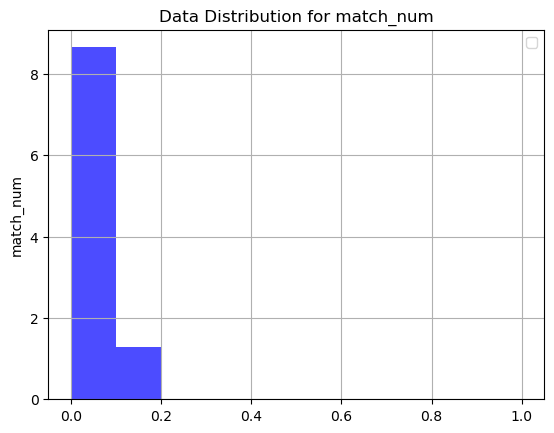

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


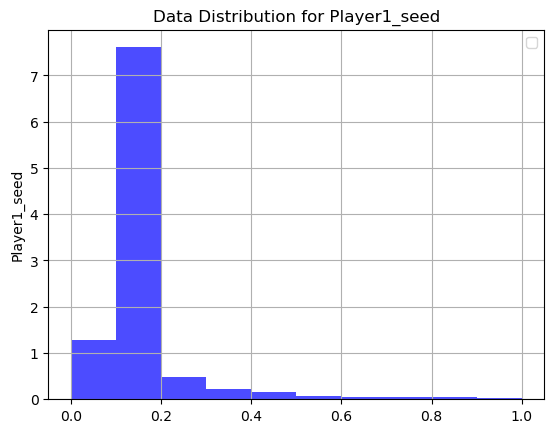

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


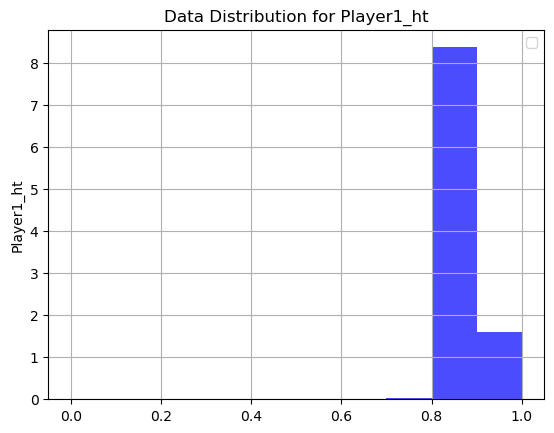

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


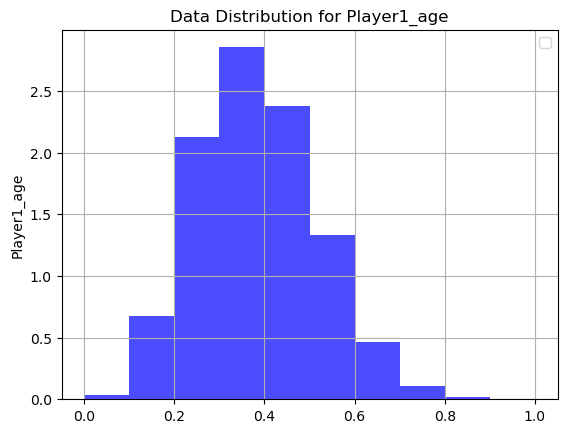

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


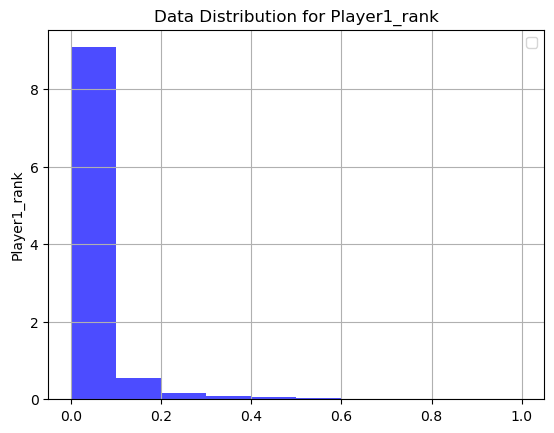

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


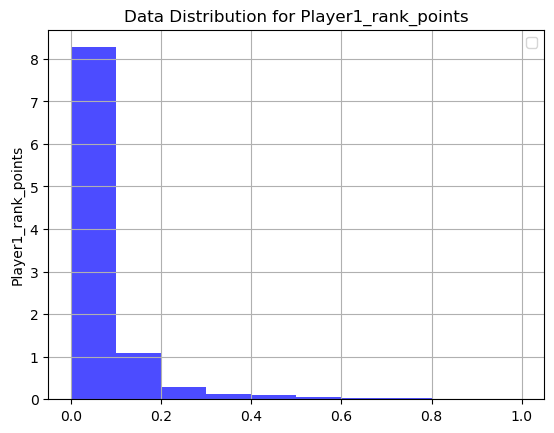

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


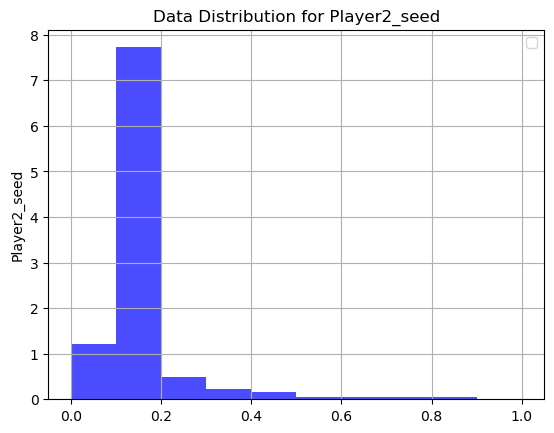

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


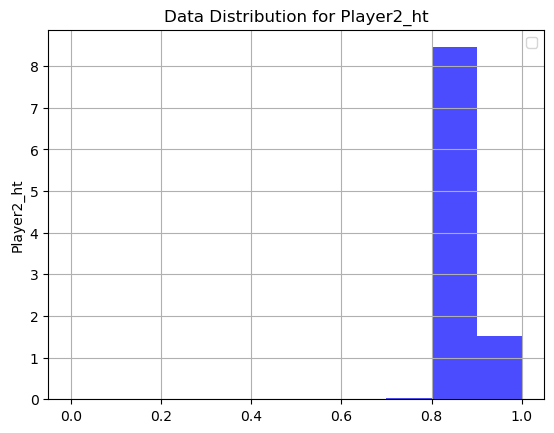

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


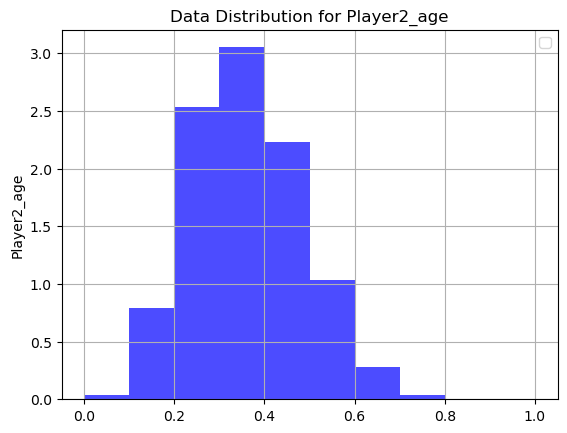

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


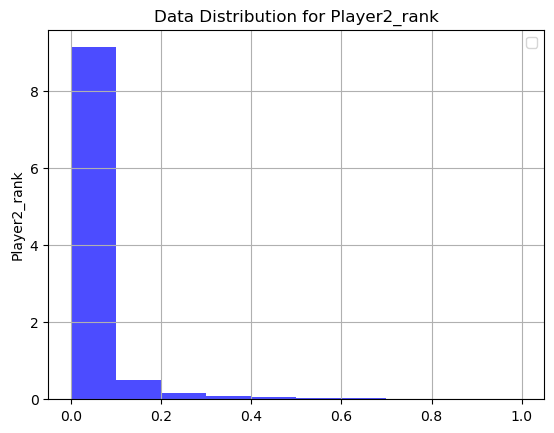

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


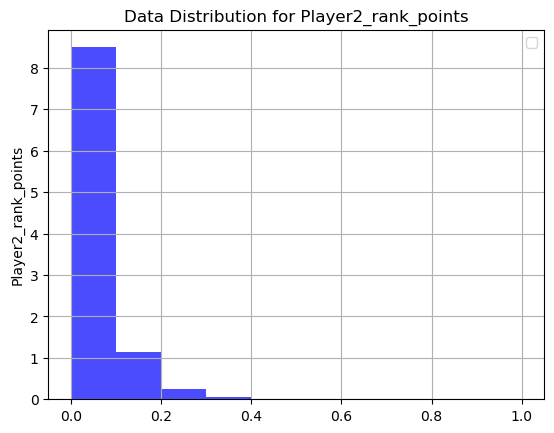

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


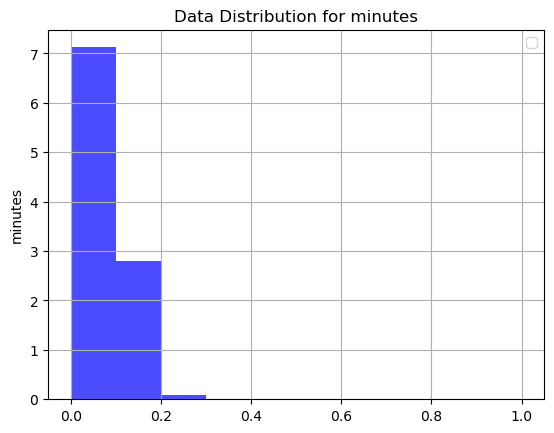

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


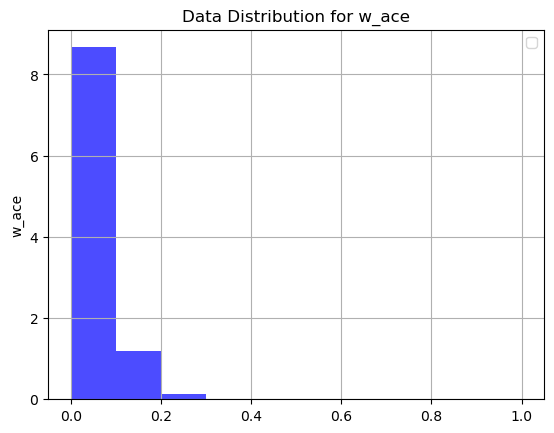

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


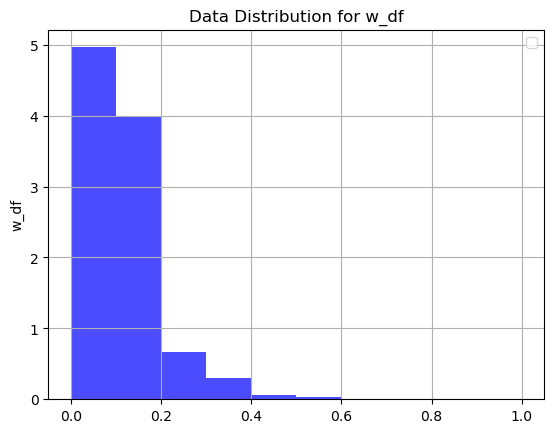

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


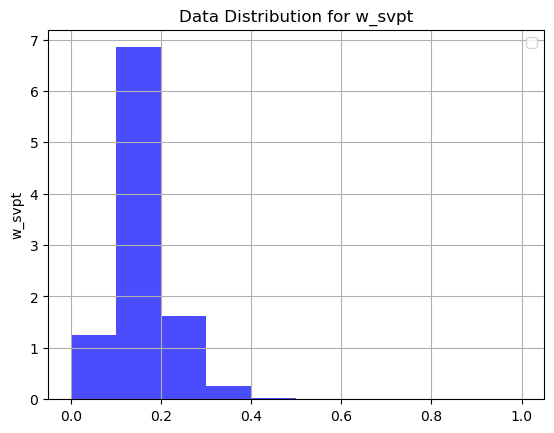

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


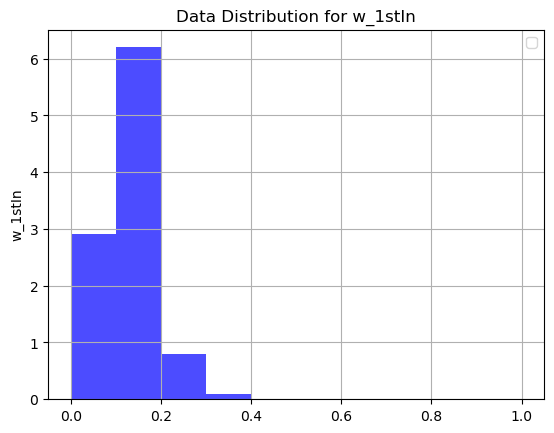

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


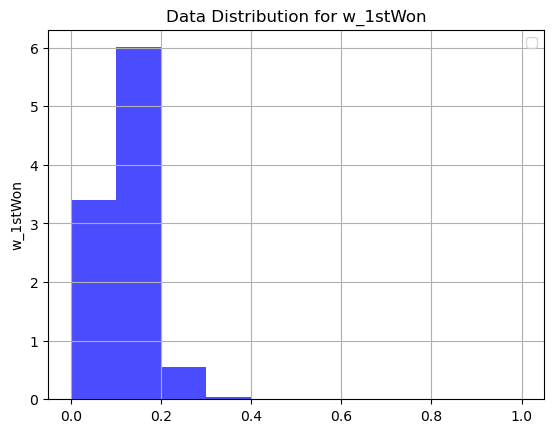

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


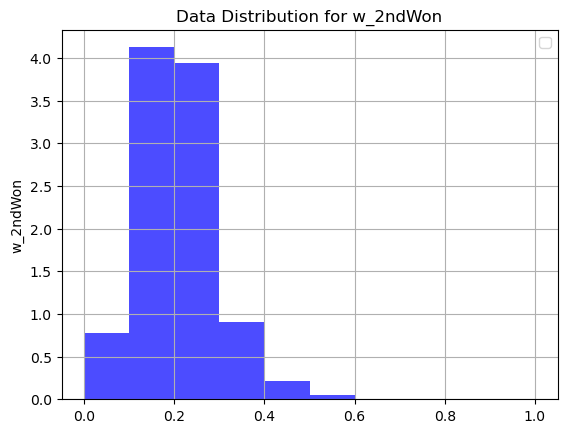

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


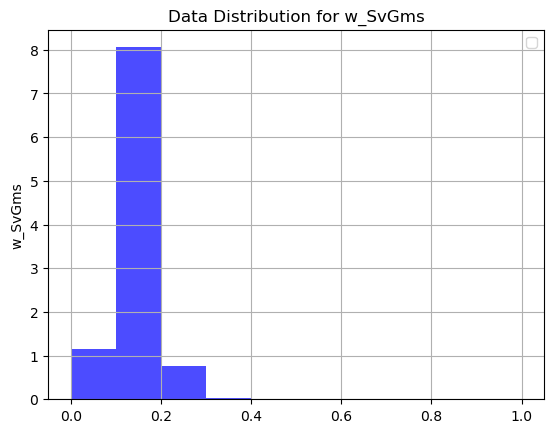

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


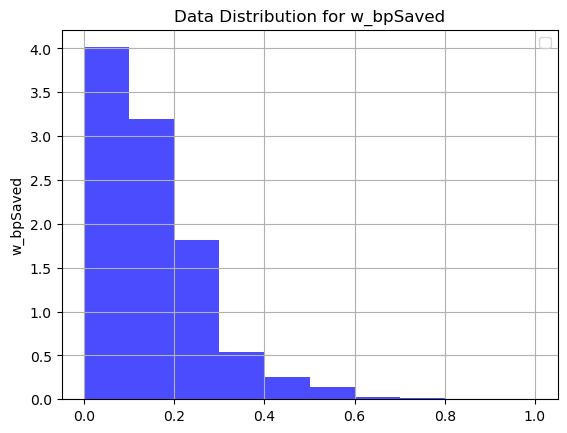

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


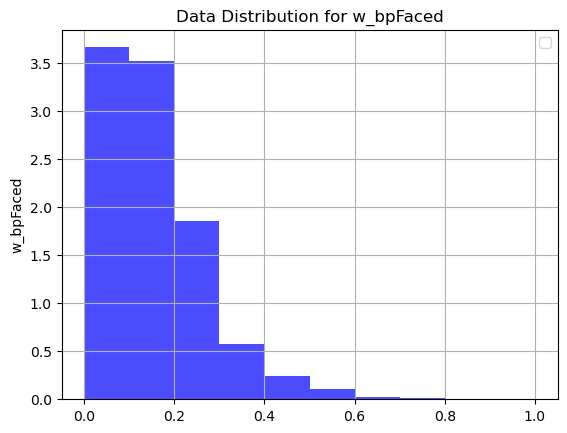

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


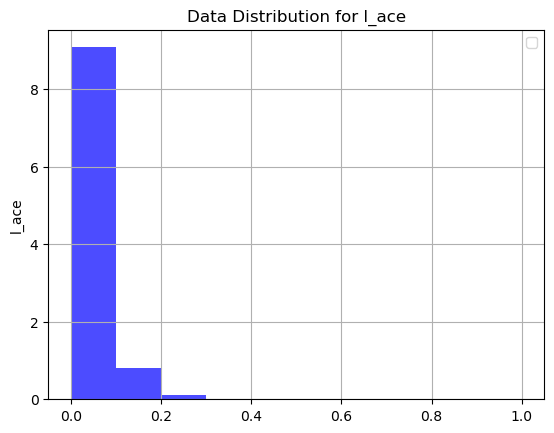

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


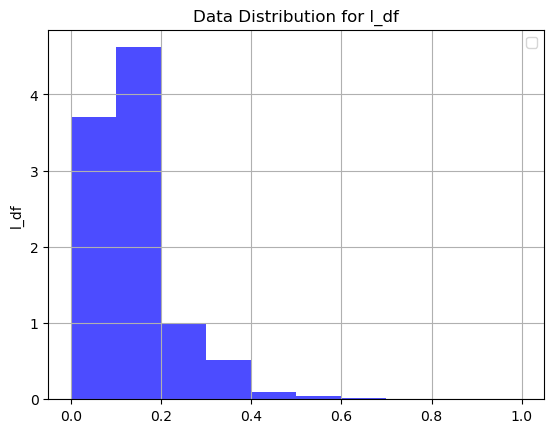

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


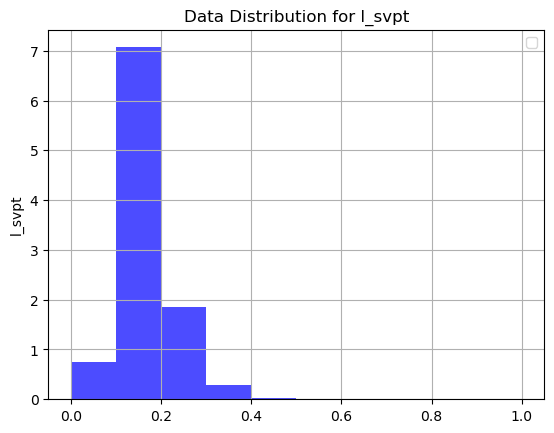

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


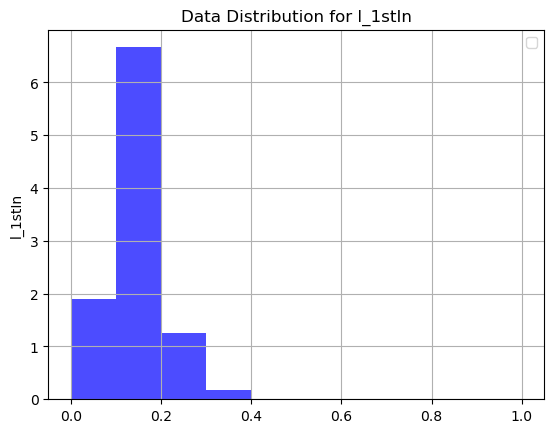

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


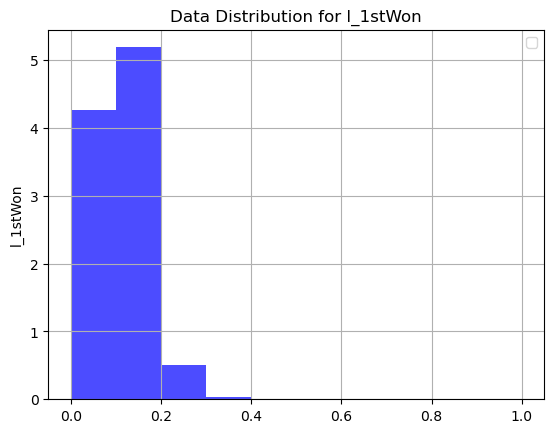

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


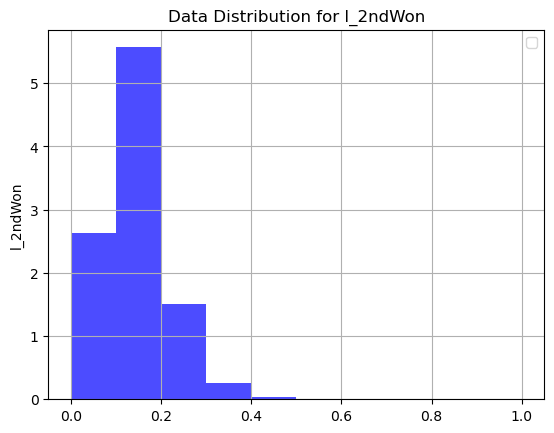

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


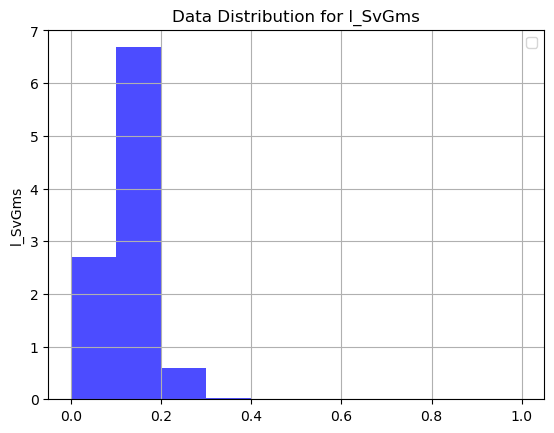

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


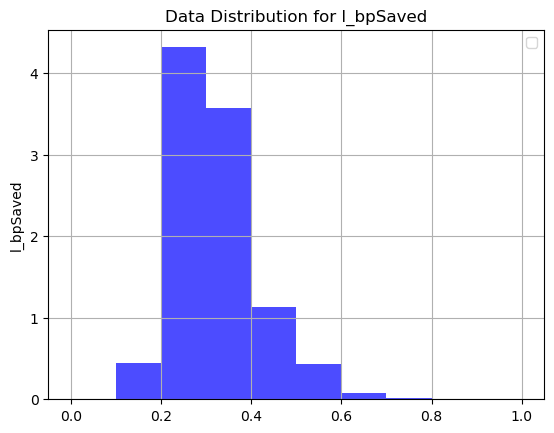

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


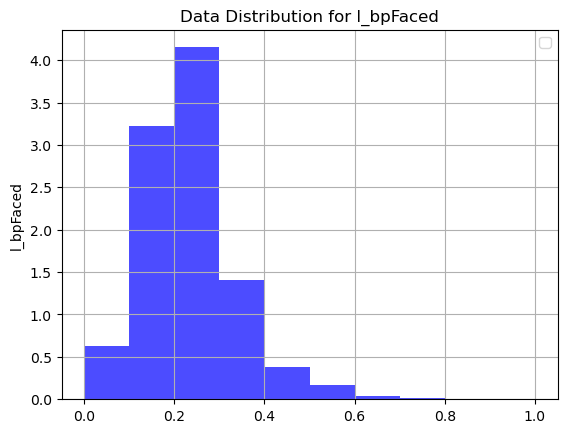

In [14]:
#plot stats
num_bins = 10
for i in num_cols:
    plt.hist(df[i],num_bins,density=True, stacked= True,facecolor='blue',alpha=0.7)
    plt.ylabel(i)
    plt.title("Data Distribution for " + i)
    plt.legend()
    plt.grid()
    plt.show()

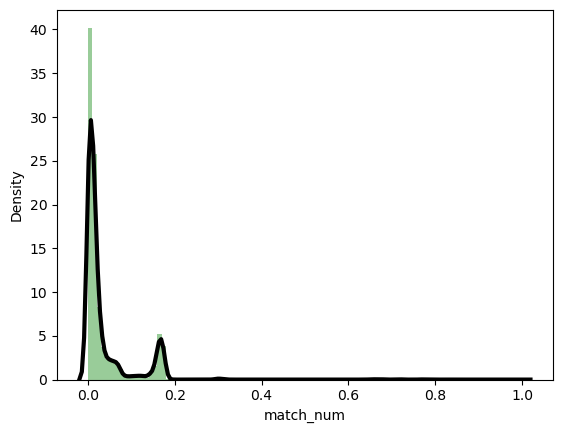

In [15]:
sns.distplot(df[num_cols[0]], color='g', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[0]},
             hist_kws={'alpha': 0.4});

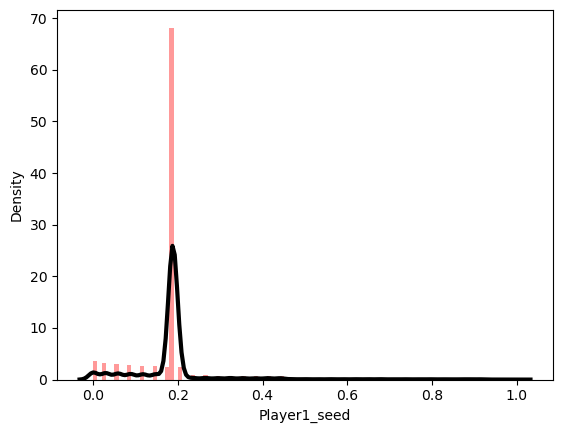

In [16]:
sns.distplot(df[num_cols[1]], color='r', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[1]},
             hist_kws={'alpha': 0.4});

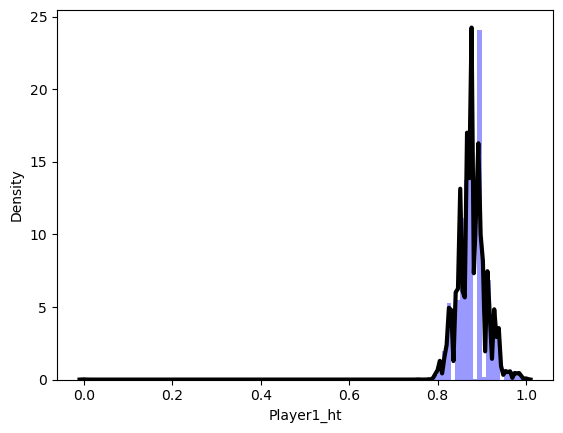

In [17]:
sns.distplot(df[num_cols[2]], color='b', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[2]},
             hist_kws={'alpha': 0.4});

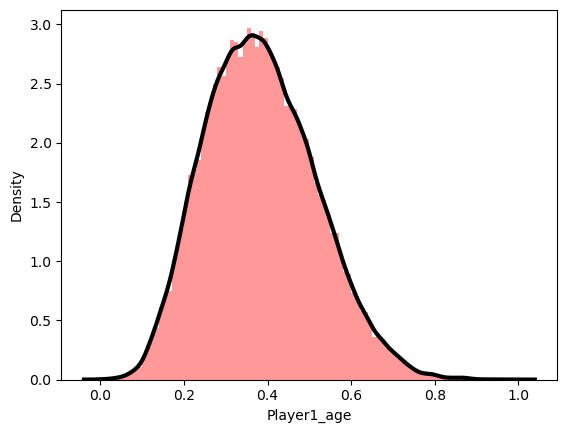

In [18]:
sns.distplot(df[num_cols[3]], color='r', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[3]},
             hist_kws={'alpha': 0.4});

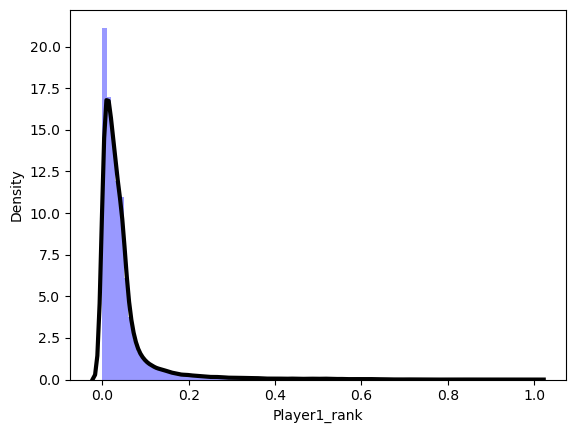

In [19]:
sns.distplot(df[num_cols[4]], color='b', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[4]},
             hist_kws={'alpha': 0.4});

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPRegressor

In [21]:
Y = pd.DataFrame(df['y'])
df = df.drop(['y'], axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [22]:
X_train = X_train.drop(['Player1_id'], axis=1)
X_train = X_train.drop(['Player1_name'], axis=1)
X_train = X_train.drop(['Player2_id'], axis=1)
X_train = X_train.drop(['Player2_name'], axis=1)

In [37]:
X_train

,match_num,Player1_ht,Player1_age,minutes,Player2_seed,Player2_ht,Player2_age,Player1_seed,w_ace,w_df,...,round_BR,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
32193,0.167647,0.875776,0.277404,0.076789,0.029412,0.937888,0.268124,0.188206,0.044248,0.000000,...,0,0,0,0,0,1,0,0,0,0
17516,0.003529,0.851887,0.487068,0.065445,0.185314,0.851887,0.406636,0.188206,0.017699,0.115385,...,0,0,0,0,0,0,1,0,0,0
38414,0.173529,0.937888,0.303837,0.074171,0.323529,0.866221,0.670613,0.088235,0.070796,0.076923,...,0,0,0,1,0,0,0,0,0,0
57182,0.017647,0.913999,0.371293,0.047120,0.147059,0.866221,0.418906,0.058824,0.035398,0.076923,...,0,0,1,0,0,0,0,0,0,0
58373,0.000000,0.866221,0.404263,0.075044,0.000000,0.866221,0.335004,0.188206,0.008850,0.038462,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.160000,0.913999,0.292279,0.060209,0.185314,0.899666,0.618595,0.176471,0.070796,0.000000,...,0,0,0,0,0,0,1,0,0,0
54886,0.008235,0.899666,0.517196,0.116056,0.185314,0.928333,0.200812,0.188206,0.150442,0.000000,...,0,0,0,0,1,0,0,0,0,0
76820,0.038824,0.866221,0.535576,0.072426,0.185314,0.875776,0.536594,0.323529,0.000000,0.038462,...,0,0,0,0,0,0,1,0,0,0
860,0.001765,0.937888,0.174704,0.064572,0.185314,0.913999,0.249287,0.176471,0.008850,0.153846,...,0,0,0,0,0,0,1,0,0,0


In [23]:
test_names = []
for index, row in X_test.iterrows():
    v = []
    v.append(row['Player1_name'])
    v.append(row['Player2_name'])
    test_names.append(v)

In [24]:
X_test = X_test.drop(['Player1_id'], axis=1)
X_test = X_test.drop(['Player1_name'], axis=1)
X_test = X_test.drop(['Player2_id'], axis=1)
X_test = X_test.drop(['Player2_name'], axis=1)

### Linear Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

# define search space
param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'sag']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9042225871550997
Best Hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 1291.5496650148827}


In [32]:
# prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     16419
           1       0.92      0.89      0.90     16370

    accuracy                           0.91     32789
   macro avg       0.91      0.91      0.91     32789
weighted avg       0.91      0.91      0.91     32789



### Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier()


# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7402472267575609
Best Hyperparameters: {'max_features': 'auto', 'max_depth': 85}


In [34]:
# prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     16419
           1       0.73      0.73      0.73     16370

    accuracy                           0.73     32789
   macro avg       0.73      0.73      0.73     32789
weighted avg       0.73      0.73      0.73     32789



### Random Forest

In [35]:
# define model
model = RandomForestClassifier()

# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8967719436800063
Best Hyperparameters: {'n_estimators': 190, 'max_depth': 65}


In [36]:
# prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16419
           1       0.93      0.87      0.90     16370

    accuracy                           0.90     32789
   macro avg       0.90      0.90      0.90     32789
weighted avg       0.90      0.90      0.90     32789

